<a href="https://colab.research.google.com/github/som2303/deeplearning-titanic/blob/main/logistic_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 정의 : 타이타닉 사고가 일어났다고 했을 때 생존 여부 예측

## 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

In [ ]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


*   Survived : 생존 여부(1/0)
*   Pclass : 티켓 등급(1/2/3)
*   Name : 이름
*   Sex : 성별
*   Age : 나이
*   Siblings/Spouses Aboard : 함께 탑승한 형제, 배우자의 수
*   Parents/Cildren Aboard : 함께 탑승한 부모, 자식의 수
*   Fare : 탑승료

In [ ]:
target = data['Survived'] # 분류기준을 Survived로 설정
y = np.array(target, dtype=np.int32)
data.drop(labels=['Name', 'Survived'], axis=1, inplace=True) # 데이터의 특성과 관련 없는 'Name, Survived'삭제
data['Sex'] = data['Sex'].map({'male':0,'female':1}) # 성별 분류를 male, female이 아닌 0과 1로 변환
x= np.array(data, dtype=np.int32)

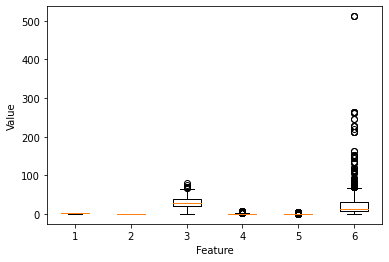

In [ ]:
plt.boxplot(x) # 데이터 분포 살펴보기
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size=0.2,random_state=42)

## Neuron 구현

In [ ]:
import sys
class LogisticNeuron: 
  def init(self):
    self.w=None 
    self.b=None

  def fwpass(self,x):
    z = np.sum(x*self.w) + self.b 
    return z

  def bwpass(self, x, err): 
    w_grad=x*err
    b_grad = 1*err 
    return w_grad,b_grad

  def fit(self, x, y, epochs=100): 
    self.w = np.ones(x.shape[1]) 
    self.b=0
    for i in range(epochs):
      for x_i, y_i in zip(x, y): 
        z=self.fwpass(x_i)
        # print(z)
        a = self.activation(z) 
        err=-(y_i-a)
        w_grad, b_grad = self.bwpass(x_i, err) 
        self.w-=w_grad
        self.b-=b_grad

  def activation(self,z):
    z = np.clip(z, -100, None)
    a=1/(1+np.exp(-z)) 
    return a

  def predict(self,x):
    z = [self.fwpass(x_i) for x_i in x] 
    a=self.activation(np.array(z))
    return a>0.5 

In [ ]:
neuron = LogisticNeuron() 
neuron.fit(x_train,y_train)
acc=np.mean(neuron.predict(x_test)==y_test)
acc

0.7696629213483146

## sklearn의 metrics을 이용하여 모델의 성능 확인
성능을 확인해 보았을 때 높은 수준은 아니지만 어느정도의 분류을 한다는 것을 확인 할 수 있다.
이 결과를 통해 성별, 가족의 유무, 수입(탑승권 가격 등)이 생존에 영향을 미쳤음을 알 수 있다.

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
guess = neuron.predict(x_test)
print(accuracy_score(y_test, guess)) # 바르게 예측한 퍼센트
print(recall_score(y_test, guess)) # 실제 True인 것을 True라고 예측할 퍼센트
print(precision_score(y_test, guess)) # True라고 예측한 결과 중 실제 True인 퍼센트
print(f1_score(y_test, guess)) #precision과 recall의 조화 평균

0.7696629213483146
0.5362318840579711
0.8043478260869565
0.6434782608695652
